# Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Graph Class for Ford-Fulkerson Algorithm

In [13]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj_matrix = [[0] * self.V for i in range(self.V)]

    def add_edge(self, u, v, weight):
        self.adj_matrix[u][v] = weight

    def bfs(self, s, t, parent):
        visited = [False] * self.V
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)

            for v in range(self.V):
                if visited[v] == False and self.adj_matrix[u][v] > 0:
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u

        return visited[t]

    def ford_fulkerson(self, source, sink):
        parent = [-1] * self.V
        max_flow = 0

        # initialize plot
        self.plot_graph()

        while self.bfs(source, sink, parent):
            path_flow = float("Inf")
            s = sink

            while s != source:
                path_flow = min(path_flow, self.adj_matrix[parent[s]][s])
                s = parent[s]

            max_flow += path_flow
            v = sink

            while v != source:
                u = parent[v]
                self.adj_matrix[u][v] -= path_flow
                self.adj_matrix[v][u] += path_flow
                v = parent[v]

            # update plot with current flow
            self.plot_graph(max_flow)

        return max_flow

    def plot_graph(self, max_flow=0):
        fig, ax = plt.subplots()
        G = nx.DiGraph()
        for u in range(self.V):
            for v in range(self.V):
                if self.adj_matrix[u][v] > 0:
                    G.add_edge(u, v, weight=self.adj_matrix[u][v])

        # specify node positions using a fixed layout
        pos = {
            0: (0, 2),
            1: (2, 3),
            2: (4, 3),
            3: (1, 1),
            4: (3, 1),
            5: (5, 2),
            6: (1, 0),
            7: (3, 0),
            8: (6, 1)
        }
        labels = dict([(i, str(i)) for i in range(self.V)])
        nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000, ax=ax)
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, ax=ax)
        edges = [(u, v) for u in range(self.V) for v in range(self.V) if self.adj_matrix[u][v] > 0]
        flow_labels = {(u, v): f"{G[u][v]['weight']}" for (u, v) in edges}
        edge_colors = ['gray' if self.adj_matrix[u][v] == 0 else 'blue' for u, v in edges]

        if max_flow > 0:
            title = f"Ford-Fulkerson Algorithm (Max Flow: {max_flow})"
        else:
            title = "Initial Graph"

        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2, alpha=0.7, arrows=True, ax=ax)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=flow_labels, label_pos=0.3, font_size=10, ax=ax)
        ax.set_title(title)
        plt.show()
        # plt.pause(10)

# Example graph for Ford-Fulkerson


In [14]:
g = Graph(9)

# Add edges with weights
g.add_edge(0, 1, 5)
g.add_edge(0, 3, 14)
g.add_edge(1, 2, 4)
g.add_edge(1, 4, 5)
g.add_edge(1, 5, 4)
g.add_edge(2, 5, 3)
g.add_edge(3, 1, 13)
g.add_edge(3, 6, 5)
g.add_edge(3, 7, 2)
g.add_edge(4, 3, 6)
g.add_edge(4, 7, 6)
g.add_edge(5, 4, 4)
g.add_edge(5, 7, 3)
g.add_edge(5, 8, 6)
g.add_edge(6, 7, 3)
g.add_edge(7, 8, 12)

# Compute maximum flow using Ford-Fulkerson

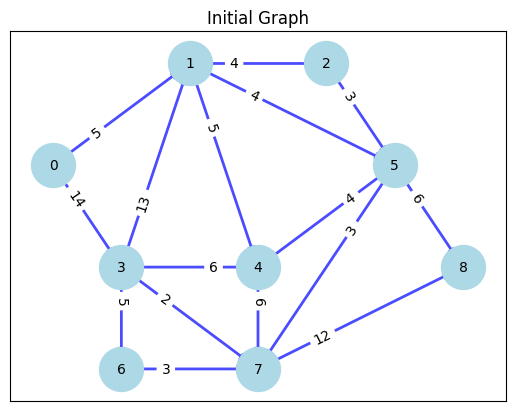

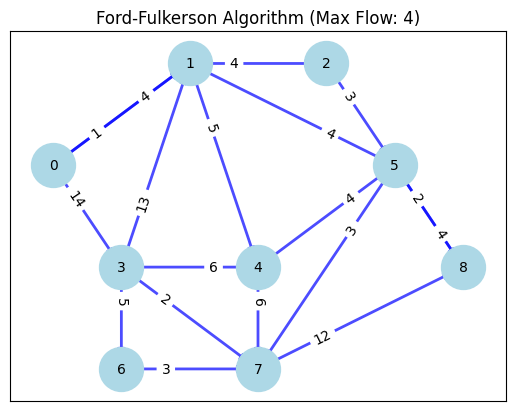

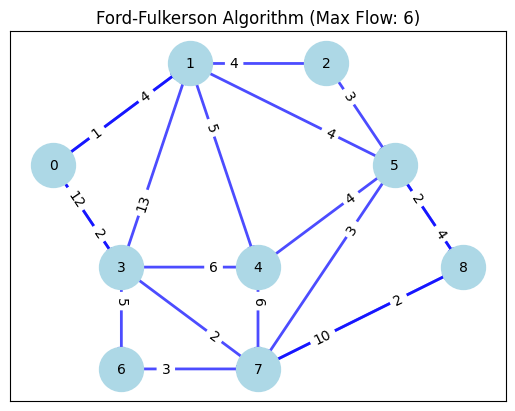

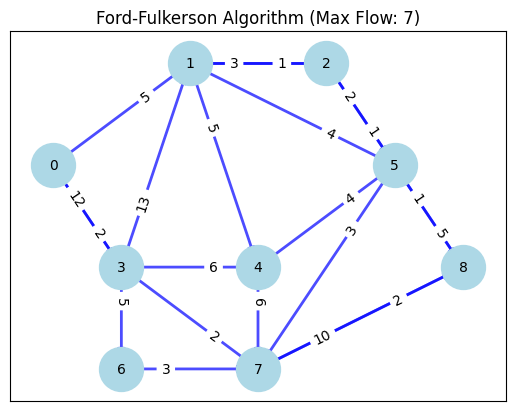

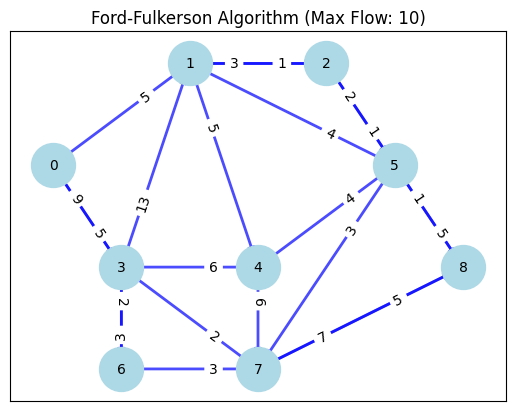

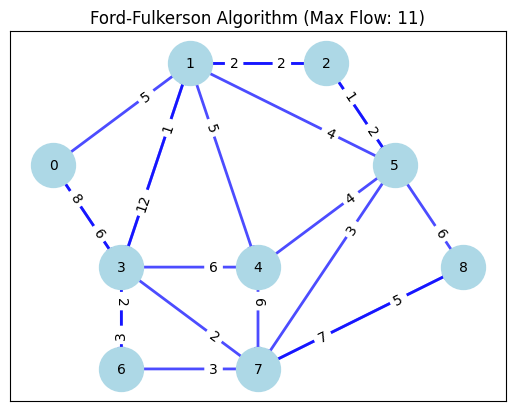

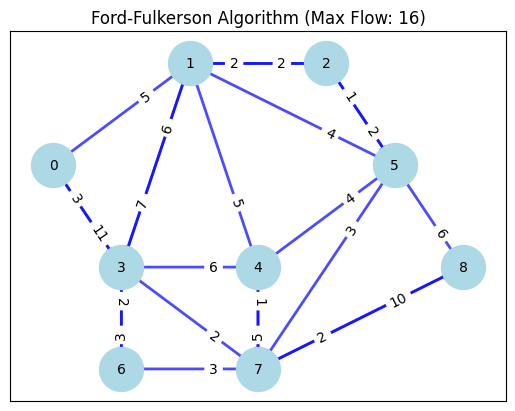

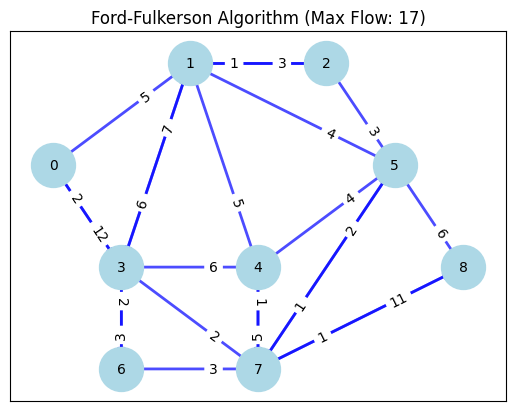

The maximum possible flow is: 17


In [15]:
# Source and sink
source = 0
sink = 8
max_flow = g.ford_fulkerson(source, sink)

print("The maximum possible flow is:", max_flow)

# Minimum Cut using NetworkX

In [20]:
# Create a graph using NetworkX for minimum cut
G = nx.Graph()
G.add_edge(0, 1, capacity=5)
G.add_edge(0, 3, capacity=14)
G.add_edge(1, 2, capacity=4)
G.add_edge(1, 4, capacity=5)
G.add_edge(1, 5, capacity=4)
G.add_edge(2, 5, capacity=3)
G.add_edge(3, 1, capacity=13)
G.add_edge(3, 6, capacity=5)
G.add_edge(3, 7, capacity=2)
G.add_edge(4, 3, capacity=6)
G.add_edge(4, 7, capacity=6)
G.add_edge(5, 4, capacity=4)
G.add_edge(5, 7, capacity=3)
G.add_edge(5, 8, capacity=6)
G.add_edge(6, 7, capacity=3)
G.add_edge(7, 8, capacity=12)

# Compute the minimum cut
cut_value, partition = nx.minimum_cut(G, 0, 8)
reachable, non_reachable = partition

# Print results
print("Minimum cut value:", cut_value)
print("Reachable nodes from source:", reachable)
print("Non-reachable nodes from source:", non_reachable)

Minimum cut value: 18
Reachable nodes from source: {0, 1, 2, 3, 4, 5, 6, 7}
Non-reachable nodes from source: {8}


# Visualize the Minimum Cut

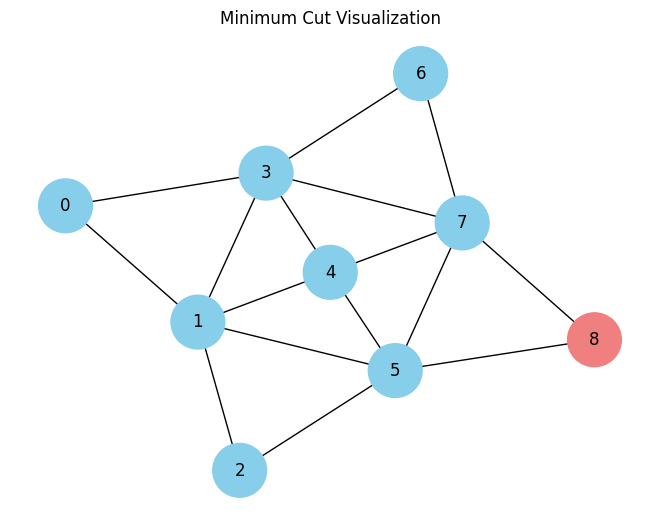

In [21]:
def plot_cut(G, reachable, non_reachable):
    pos = nx.spring_layout(G)
    color_map = ['skyblue' if node in reachable else 'lightcoral' for node in G]

    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1500)
    plt.title("Minimum Cut Visualization")
    plt.show()

plot_cut(G, reachable, non_reachable)